In [1]:
import os
import numpy as np
import nibabel as nib
from dipy.io import read_bvals_bvecs
import matplotlib.pyplot as plt

In [2]:
data_path = r"100307_3T_Diffusion_preproc\100307\T1w"
dwi_file = os.path.join(data_path, r"diffusion/data.nii.gz")
img = nib.load(dwi_file)

In [3]:
data = img.get_fdata()
print(f"Diffusion data shape: {data.shape}")

Diffusion data shape: (145, 174, 145, 288)
Data type: float64


In [8]:
bvals_file = os.path.join(data_path, r'diffusion/bvals')
bvecs_file = os.path.join(data_path, r'diffusion/bvecs')

bvals, bvecs = read_bvals_bvecs(bvals_file, bvecs_file)
print(f"Number of b-values: {len(bvals)}")
print(f"Unique b-values: {np.unique(bvals)}")
print(f"Shape of bvecs: {bvecs.shape}")

Number of b-values: 288
Unique b-values: [   5.  990.  995. 1000. 1005. 1985. 1990. 1995. 2000. 2005. 2010. 2980.
 2985. 2990. 2994. 2995. 3000. 3005. 3010.]
Shape of bvecs: (288, 3)


View Mask

Mask shape: (145, 174, 145)


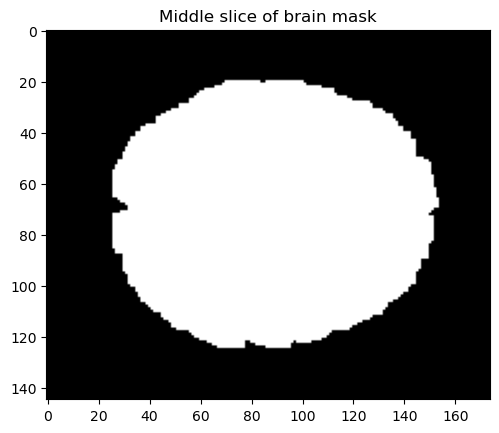

In [18]:
mask_file = os.path.join(data_path, r'diffusion/nodif_brain_mask.nii.gz')
mask_img = nib.load(mask_file)
mask_data = mask_img.get_fdata()
print(f"Mask shape: {mask_data.shape}")

plt.imshow(mask_data[:,:,mask_data.shape[2]//2], cmap='gray')
plt.title('Middle slice of brain mask')
plt.show()

In [20]:
grad_dev_file = os.path.join(data_path, r'diffusion/grad_dev.nii.gz')
grad_dev_img = nib.load(grad_dev_file)
grad_dev_data = grad_dev_img.get_fdata()
print(f"Gradient deviation data shape: {grad_dev_data.shape}")
print(f"Grad dev components for a central voxel:\n{grad_dev_data[72, 87, 72, :]}")

Gradient deviation data shape: (145, 174, 145, 9)
Grad dev components for a central voxel:
[ 0.00291466  0.001101   -0.00023776  0.00076151  0.00533886 -0.00034687
 -0.00031664 -0.00099412  0.00352166]


Compare b=0 and a weighted image. (This is just the signal strength, no DTI calculated yet.)

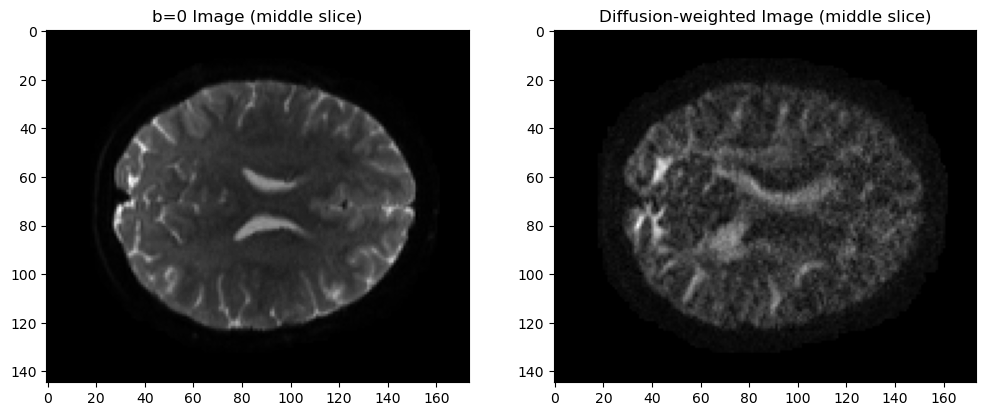

In [23]:
# Plot a middle slice from a b=0 volume and a diffusion-weighted volume
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Assuming the first volume is b=0 and the last is diffusion-weighted
ax1.imshow(data[:, :, data.shape[2]//2, 0], cmap='gray')
ax1.set_title('b=0 Image (middle slice)')

ax2.imshow(data[:, :, data.shape[2]//2, -1], cmap='gray')
ax2.set_title('Diffusion-weighted Image (middle slice)')

plt.show()

T1w image: structural info for reference


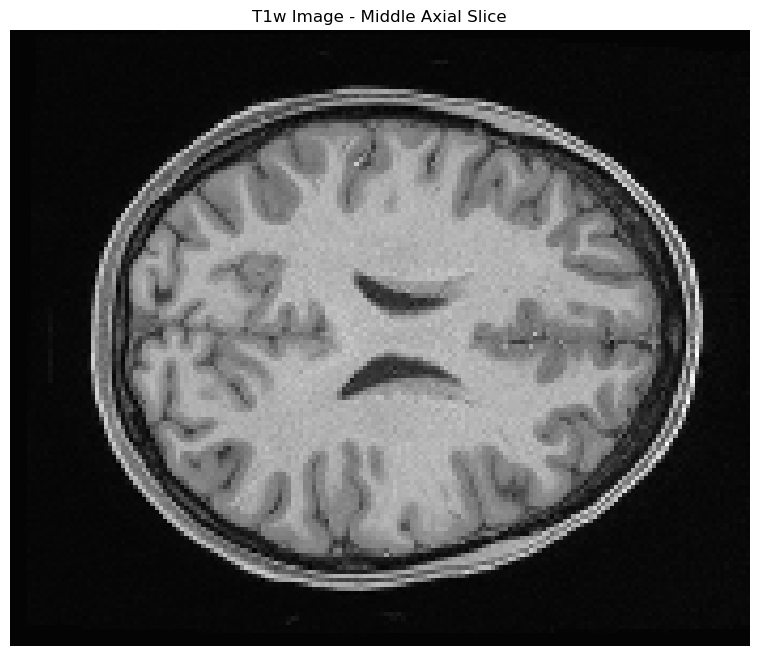

T1w image shape: (145, 174, 145)
T1w data type: float64


In [27]:
t1_img = nib.load(r'100307_3T_Diffusion_preproc\100307\T1w\T1w_acpc_dc_restore_1.25.nii.gz')
t1_data = t1_img.get_fdata()

# Display a middle slice
plt.figure(figsize=(10, 8))
plt.imshow(t1_data[:, :, t1_data.shape[2]//2], cmap='gray')
plt.title('T1w Image - Middle Axial Slice')
plt.axis('off')
plt.show()

print(f"T1w image shape: {t1_data.shape}")
print(f"T1w data type: {t1_data.dtype}")